In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import os
import re
import datetime
import pickle
sbn.set_context(font_scale=1.5)

In [405]:
os.chdir('C:/Users/joaqu/Box/Emotional-State-Capstone/data/')

In [378]:
DND_experience_sample = pd.read_csv('./DND/experience_sampling/NeuromodulationDesir_DATA_2018-09-04_1916.csv')

In [5]:
DND_experience_sample.head()

,participant_id,redcap_survey_identifier,desires_survey_timestamp,subject,location,lap,hap,han,lan,la,...,desire_type_3,other_desire_3,desire_strength_3,desire_conflict_3,conflict_type_3,other_conflict_3,attempt_resist_3,desire_enacted_3,desire_presence_3,desires_survey_complete
0,1,NaN,2016-01-12 07:57:11,007,Walking to work,1.0,3.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2,NaN,2016-01-12 09:25:26,012,Home,4.0,4.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,3,NaN,2016-01-12 09:29:13,005,At work,4.0,4.0,1.0,2.0,4.0,...,9.0,NaN,3.0,4.0,4.0,NaN,1.0,0.0,0.0,2
3,4,NaN,2016-01-12 09:46:36,011,Home,4.0,2.0,1.0,3.0,3.0,...,1.0,NaN,2.0,0.0,NaN,NaN,0.0,0.0,0.0,2
4,5,NaN,2016-01-12 13:42:33,007,Work,5.0,3.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


# R00

In [406]:
R00_experience_sample = pd.read_csv('./R00/experience_sampling/r00-exp-data.csv')  #we need to make a large file with all the  cases and rename the columns
R00_experience_sample.head()

,id,sub_no,survey_no,start,end,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_date,start_time,end_date,end_time
0,1047-1,1047,1,2016-02-19 13:49:36,2016-02-19 13:51:32,1,2,0,0,1,3,0,0,2016-02-19,13:49:36,2016-02-19,13:51:32
1,1047-2,1047,2,2016-02-20 07:32:33,2016-02-20 07:33:40,1,0,0,1,2,2,0,0,2016-02-20,07:32:33,2016-02-20,07:33:40
2,1047-3,1047,3,2016-02-20 15:39:23,2016-02-20 15:41:25,2,2,0,0,2,4,0,0,2016-02-20,15:39:23,2016-02-20,15:41:25
3,1047-4,1047,4,2016-02-20 21:13:34,2016-02-20 21:14:21,3,2,0,0,1,3,0,0,2016-02-20,21:13:34,2016-02-20,21:14:21
4,1047-5,1047,5,2016-02-21 07:11:48,2016-02-21 07:12:34,3,0,0,1,3,1,0,0,2016-02-21,07:11:48,2016-02-21,07:12:34


---

# Lets merge the dataset for experiencing sample
---

# DND

In [383]:
DND_experience_sample.head()

,participant_id,redcap_survey_identifier,desires_survey_timestamp,subject,location,lap,hap,han,lan,la,...,desire_type_3,other_desire_3,desire_strength_3,desire_conflict_3,conflict_type_3,other_conflict_3,attempt_resist_3,desire_enacted_3,desire_presence_3,desires_survey_complete
0,1,NaN,2016-01-12 07:57:11,007,Walking to work,1.0,3.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2,NaN,2016-01-12 09:25:26,012,Home,4.0,4.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,3,NaN,2016-01-12 09:29:13,005,At work,4.0,4.0,1.0,2.0,4.0,...,9.0,NaN,3.0,4.0,4.0,NaN,1.0,0.0,0.0,2
3,4,NaN,2016-01-12 09:46:36,011,Home,4.0,2.0,1.0,3.0,3.0,...,1.0,NaN,2.0,0.0,NaN,NaN,0.0,0.0,0.0,2
4,5,NaN,2016-01-12 13:42:33,007,Work,5.0,3.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [442]:
print(DND_experience_sample.subject.unique())
len(DND_experience_sample.subject.unique())

['007' '012' '005' '011' '001' '023' '016' '014' '018' '021' '030' '006'
 '031' '022' '029' '019' '034' '027' '033' '013' '041' '037' '044' '039'
 '042' '046' '048' '032' '043' '040' '045' '050' '052' '057' '058' '060'
 '062' '065' '070' '075' '069' '077' '072' '073' '078' '080' '074' '087'
 '090' '084' '088' '091' '089' '094' '092' '083' '002' '093' '097' '096'
 '100' '098' '099' '102' '105' '104' '109' '107' '110' '111' '114' '115'
 '113' '118' '119' '121']


76

In [385]:
# Subject 119 has a typo in one case (it's labeled '1q9'), and also the '072 ' and ' 031' have an extra space.
# And there is a nan value. Let's fix this things
DND_experience_sample.loc[DND_experience_sample['subject'] == '1q9','subject'] = '119'
DND_experience_sample.loc[DND_experience_sample['subject'] == '072 ','subject'] = '072'
DND_experience_sample.loc[DND_experience_sample['subject'] == ' 031','subject'] = '031'

In [386]:
DND_experience_sample.loc[DND_experience_sample['subject'].isna(),:] 

,participant_id,redcap_survey_identifier,desires_survey_timestamp,subject,location,lap,hap,han,lan,la,...,desire_type_3,other_desire_3,desire_strength_3,desire_conflict_3,conflict_type_3,other_conflict_3,attempt_resist_3,desire_enacted_3,desire_presence_3,desires_survey_complete
431,432,NaN,[not completed],NaN,NaN,3.0,4.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
546,547,NaN,[not completed],NaN,NaN,1.0,4.0,2.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1015,1016,NaN,[not completed],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2031,2032,NaN,[not completed],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


We are going to remove all the missing values, we dont have access to the subject number neither

In [387]:
DND_experience_sample = DND_experience_sample.loc[DND_experience_sample['subject'].notna(),:].copy() 

In [388]:
DND_experience_sample.columns

Index(['participant_id', 'redcap_survey_identifier',
       'desires_survey_timestamp', 'subject', 'location', 'lap', 'hap', 'han',
       'lan', 'la', 'p', 'n', 'ha', 'desire_type', 'other_desire',
       'desire_strength', 'desire_conflict', 'conflict_type', 'other_conflict',
       'attempt_resist', 'desire_enacted', 'desire_presence', 'desire_type_2',
       'other_desire_2', 'desire_strength_2', 'desire_conflict_2',
       'conflict_type_2', 'other_conflict_2', 'attempt_resist_2',
       'desire_enacted_2', 'desire_presence_2', 'desire_type_3',
       'other_desire_3', 'desire_strength_3', 'desire_conflict_3',
       'conflict_type_3', 'other_conflict_3', 'attempt_resist_3',
       'desire_enacted_3', 'desire_presence_3', 'desires_survey_complete'],
      dtype='object')

In [389]:
DND_sub = DND_experience_sample.loc[:,['subject', 'lap','hap','han','lan','la','p','n','ha','desires_survey_timestamp']]

In [390]:
DND_sub.head()

,subject,lap,hap,han,lan,la,p,n,ha,desires_survey_timestamp
0,007,1.0,3.0,2.0,1.0,2.0,3.0,1.0,1.0,2016-01-12 07:57:11
1,012,4.0,4.0,1.0,1.0,2.0,4.0,1.0,1.0,2016-01-12 09:25:26
2,005,4.0,4.0,1.0,2.0,4.0,5.0,1.0,1.0,2016-01-12 09:29:13
3,011,4.0,2.0,1.0,3.0,3.0,4.0,1.0,2.0,2016-01-12 09:46:36
4,007,5.0,3.0,1.0,1.0,2.0,4.0,1.0,3.0,2016-01-12 13:42:33


In [391]:
round(DND_sub.describe(),2)

,lap,hap,han,lan,la,p,n,ha
count,2184.00,2185.00,2185.00,2185.00,2185.00,2185.00,2185.00,2185.00
mean,3.01,2.36,1.37,1.96,2.28,3.16,1.39,1.43
std,1.13,1.07,0.76,1.06,1.09,1.06,0.75,0.79
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00
50%,3.00,2.00,1.00,2.00,2.00,3.00,1.00,1.00
75%,4.00,3.00,1.00,3.00,3.00,4.00,2.00,2.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


(array([ 2.,  0.,  0.,  0.,  5., 12., 45.,  6.,  1.,  5.]),
 array([ 1. ,  5.4,  9.8, 14.2, 18.6, 23. , 27.4, 31.8, 36.2, 40.6, 45. ]),
 <a list of 10 Patch objects>)

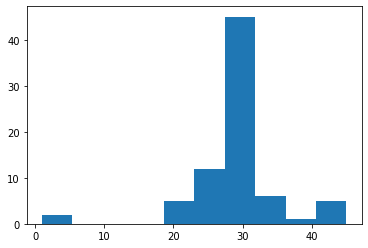

In [392]:
surveys = DND_sub.groupby('subject').count()['desires_survey_timestamp']
plt.hist(surveys)

I am going to add the survey number for every subject

In [393]:
DND_sub.reset_index(drop = True)

,subject,lap,hap,han,lan,la,p,n,ha,desires_survey_timestamp
0,007,1.0,3.0,2.0,1.0,2.0,3.0,1.0,1.0,2016-01-12 07:57:11
1,012,4.0,4.0,1.0,1.0,2.0,4.0,1.0,1.0,2016-01-12 09:25:26
2,005,4.0,4.0,1.0,2.0,4.0,5.0,1.0,1.0,2016-01-12 09:29:13
3,011,4.0,2.0,1.0,3.0,3.0,4.0,1.0,2.0,2016-01-12 09:46:36
4,007,5.0,3.0,1.0,1.0,2.0,4.0,1.0,3.0,2016-01-12 13:42:33
...,...,...,...,...,...,...,...,...,...,...
2180,121,2.0,1.0,4.0,2.0,2.0,1.0,4.0,1.0,2018-04-01 18:00:19
2181,121,2.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,2018-04-01 23:42:54
2182,121,1.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2018-04-02 16:47:21
2183,121,2.0,3.0,1.0,2.0,2.0,4.0,2.0,1.0,2018-04-02 16:47:27


In [394]:
DND_sub['survey_no'] = None
for subj in DND_sub['subject'].unique():
    #print(subj)
    data_subj = DND_sub.loc[DND_sub['subject'] == subj,:] 
    #print(data_subj)
    for n, i in enumerate(data_subj.index, start=1):
        #print(n)
        DND_sub.loc[i,'survey_no'] = n

In [395]:
DND_sub = DND_sub.rename(columns = {'lap':'la_p',	'hap':'ha_p',
                          'han':'ha_n','lan':'la_n',
                          'desires_survey_timestamp' : 'start_survey'}).copy()

In [396]:
DND_sub.groupby('subject').agg('count')

,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no
subject,,,,,,,,,,
001,1,1,1,1,1,1,1,1,1,1
002,1,1,1,1,1,1,1,1,1,1
005,32,32,32,32,32,32,32,32,32,32
006,26,26,26,26,26,26,26,26,26,26
007,44,44,44,44,44,44,44,44,44,44
...,...,...,...,...,...,...,...,...,...,...
114,32,32,32,32,32,32,32,32,32,32
115,33,33,33,33,33,33,33,33,33,33
118,22,22,22,22,22,22,22,22,22,22


## Subjects 1 and 2 does not have data. We should remove these ones

In [397]:
DND_sub.loc[DND_sub['subject'].isin(['001','002']),:].index

Int64Index([8, 1598], dtype='int64')

In [398]:
DND_sub = DND_sub.drop(labels=[8,1598],axis = 0).reset_index(drop=True).copy()

In [399]:
# Let's explore if we have missing fitbit data for our subjects
files = os.listdir('C:/Users/joaqu/Box/Emotional-State-Capstone/data/DND/fitbit/fitbit_daily/')
subj = []
for i in files:
    if re.findall(r'^DND[0-9]+',i):
        subj.append((i.split('.')[0][3:]))
len(subj)
print(set(subj))

{'018', '005', '045', '098', '044', '023', '107', '037', '111', '074', '021', '069', '115', '052', '119', '109', '027', '084', '065', '097', '013', '089', '030', '014', '075', '046', '094', '105', '072', '118', '078', '091', '011', '033', '050', '099', '080', '110', '057', '040', '039', '032', '104', '029', '092', '034', '048', '087', '060', '062', '073', '088', '016', '100', '093', '090', '031', '083', '070', '022', '019', '042', '007', '102', '113', '041', '121', '096', '114', '012', '006', '077', '043'}


In [400]:
set.difference(set((DND_sub['subject'].unique())), (set(subj)))

{'058'}

### We need to remove '058' from the  dataframe because we do not have fitbit data for this subject

In [401]:
DND_sub = DND_sub.loc[DND_sub['subject'] != '058', : ].copy()

In [441]:
len(DND_sub['subject'].unique())

73

In [444]:
set.difference(set(DND_experience_sample.subject.unique()),set(DND_sub['subject'].unique()))

{'001', '002', '058'}

In [403]:
#Let's save
os.chdir('C:/Users/joaqu/OneDrive/Escritorio/emotional-states/Code/EDA')
with open('./Clean_DND/EXPERIENCING_SAMPLE_DF.pickle', 'wb') as handle:
    pickle.dump(DND_sub,handle)

----
# R00
----

In [407]:
R00_experience_sample.head()

,id,sub_no,survey_no,start,end,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_date,start_time,end_date,end_time
0,1047-1,1047,1,2016-02-19 13:49:36,2016-02-19 13:51:32,1,2,0,0,1,3,0,0,2016-02-19,13:49:36,2016-02-19,13:51:32
1,1047-2,1047,2,2016-02-20 07:32:33,2016-02-20 07:33:40,1,0,0,1,2,2,0,0,2016-02-20,07:32:33,2016-02-20,07:33:40
2,1047-3,1047,3,2016-02-20 15:39:23,2016-02-20 15:41:25,2,2,0,0,2,4,0,0,2016-02-20,15:39:23,2016-02-20,15:41:25
3,1047-4,1047,4,2016-02-20 21:13:34,2016-02-20 21:14:21,3,2,0,0,1,3,0,0,2016-02-20,21:13:34,2016-02-20,21:14:21
4,1047-5,1047,5,2016-02-21 07:11:48,2016-02-21 07:12:34,3,0,0,1,3,1,0,0,2016-02-21,07:11:48,2016-02-21,07:12:34


In [408]:
R00_sub = R00_experience_sample.loc[:,['sub_no', 'la_p','ha_p','ha_n',
                                       'la_n','la','p','n','ha', 'start', 'survey_no']]

In [409]:
R00_sub.dtypes

sub_no        int64
la_p          int64
ha_p          int64
ha_n          int64
la_n          int64
la            int64
p             int64
n             int64
ha            int64
start        object
survey_no     int64
dtype: object

###  Let's count the number of subjects on our experience data and our fitbit data

In [410]:
print(R00_sub['sub_no'].unique())
len(R00_sub['sub_no'].unique())

[1047 1084 1085 1050 1087 1079 1051 1045 1041 1055 1096 1097 1081 1080
 1030 1024 1018 1019 1032 1037 1009 1035 1021 1020 1034 1008 1039 1004
 1016 1002 1014 1029 1066 1067 1073 1048 1060 1049]


38

In [411]:
files = os.listdir('C:/Users/joaqu/Box/Emotional-State-Capstone/data/R00/fitbit/fitbit_detailed')
subj = []
for i in files:
    if re.findall(r'^R00_[0-9]+_',i):
        subj.append(int(i.split('_')[1]))
len(subj)
print(set(subj))

{1024, 1029, 1030, 1032, 1034, 1035, 1037, 1039, 1041, 1045, 1047, 1048, 1049, 1050, 1051, 1060, 1066, 1067, 1073, 1079, 1080, 1081, 1084, 1085, 1087, 1096, 1097, 1002, 1004, 1008, 1009, 1014, 1016, 1018, 1019, 1020, 1021}


There is one missing value in fitbit data

In [412]:
set.difference(set((R00_sub['sub_no'].unique())), (set(subj)))

{1055}

In [413]:
#We should discard the subject 1055

In [419]:
os.chdir('C:/Users/joaqu/OneDrive/Escritorio/emotional-states/Code/EDA')
with open('Clean Data R00/SURVEY_DF.pickle', 'rb') as handle:
    survey = pickle.load(handle)
sum(survey['Demographics']['Subject'] == 1055)

0

In [420]:
R00_sub = R00_sub.loc[R00_sub['sub_no'] != 1055, : ]

In [421]:
set.difference(set((R00_sub['sub_no'].unique())), (set(subj)))

set()

---

In [422]:
round(R00_sub.describe(),2).iloc[:,1:-1]

,la_p,ha_p,ha_n,la_n,la,p,n,ha
count,922.00,922.00,922.00,922.00,922.00,922.00,922.00,922.00
mean,1.93,1.36,0.17,0.67,1.33,2.19,0.25,0.31
std,1.11,1.11,0.51,0.95,1.00,1.02,0.63,0.65
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,1.00,2.00,0.00,0.00
50%,2.00,1.00,0.00,0.00,1.00,2.00,0.00,0.00
75%,3.00,2.00,0.00,1.00,2.00,3.00,0.00,0.00
max,8.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00


In [423]:
R00_sub = R00_sub.rename(columns = {'sub_no' : 'subject', 'start':'start_survey'}).copy()

In [424]:
R00_sub

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no
0,1047,1,2,0,0,1,3,0,0,2016-02-19 13:49:36,1
1,1047,1,0,0,1,2,2,0,0,2016-02-20 07:32:33,2
2,1047,2,2,0,0,2,4,0,0,2016-02-20 15:39:23,3
3,1047,3,2,0,0,1,3,0,0,2016-02-20 21:13:34,4
4,1047,3,0,0,1,3,1,0,0,2016-02-21 07:11:48,5
...,...,...,...,...,...,...,...,...,...,...,...
945,1049,0,3,1,0,0,3,2,0,2016-05-25 13:21:00,20
946,1049,0,2,0,0,0,2,2,0,2016-05-25 19:36:00,21
947,1049,0,2,3,0,0,0,3,0,2016-05-26 07:15:00,22
948,1049,0,2,2,0,1,2,2,1,2016-05-26 15:06:00,23


In [425]:
os.chdir('C:/Users/joaqu/OneDrive/Escritorio/emotional-states/Code/EDA')
with open('./Clean Data R00/EXPERIENCING_SAMPLE_DF.pickle', 'wb') as handle:
    pickle.dump(R00_sub,handle)

---
# Merging
---

In [445]:
os.chdir('C:/Users/joaqu/OneDrive/Escritorio/emotional-states/Code/EDA')
with open('./Clean Data R00/EXPERIENCING_SAMPLE_DF.pickle', 'rb') as handle:
    R00_sub = pickle.load(handle)
with open('./Clean_DND/EXPERIENCING_SAMPLE_DF.pickle', 'rb') as handle:
    DND_sub = pickle.load(handle)

In [446]:
#First apply the same scales
#Let's modify R00
R00_sub.loc[:,'la_p':'ha'] = R00_sub.loc[:,'la_p':'ha'].astype(float) + 1

In [447]:
R00_sub['subject'] = R00_sub['subject'].astype(str)

In [448]:
#Checking types
R00_sub.dtypes

subject          object
la_p            float64
ha_p            float64
ha_n            float64
la_n            float64
la              float64
p               float64
n               float64
ha              float64
start_survey     object
survey_no         int64
dtype: object

In [449]:
DND_sub.dtypes

subject          object
la_p            float64
ha_p            float64
ha_n            float64
la_n            float64
la              float64
p               float64
n               float64
ha              float64
start_survey     object
survey_no         int64
dtype: object

In [450]:
#They match. Let's add columns informing the type of experiment
R00_sub['experiment'] = 'R00'
DND_sub['experiment'] = 'DND'

In [451]:
#Let's  concatenate
exp_sample = pd.concat([R00_sub,DND_sub], axis=0, join='outer', sort = False).copy()

In [452]:
exp_sample.reset_index(drop=True , inplace=True)
exp_sample

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no,experiment
0,1047,2.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,2016-02-19 13:49:36,1,R00
1,1047,2.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0,2016-02-20 07:32:33,2,R00
2,1047,3.0,3.0,1.0,1.0,3.0,5.0,1.0,1.0,2016-02-20 15:39:23,3,R00
3,1047,4.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,2016-02-20 21:13:34,4,R00
4,1047,4.0,1.0,1.0,2.0,4.0,2.0,1.0,1.0,2016-02-21 07:11:48,5,R00
...,...,...,...,...,...,...,...,...,...,...,...,...
3078,121,2.0,1.0,4.0,2.0,2.0,1.0,4.0,1.0,2018-04-01 18:00:19,27,DND
3079,121,2.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,2018-04-01 23:42:54,28,DND
3080,121,1.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2018-04-02 16:47:21,29,DND
3081,121,2.0,3.0,1.0,2.0,2.0,4.0,2.0,1.0,2018-04-02 16:47:27,30,DND


## We need to create a DATE column to merge with HR and Steps

In [453]:
exp_sample['start_survey'][0]

'2016-02-19 13:49:36'

In [454]:
times = []
mis_idx = []
for n,i in enumerate(exp_sample['start_survey']):
    try:
        times.append(str(i.month)+str(i.day))
    except:
        #print(i)
        try:
            datos = i.split('-')
            datos[2] = datos[2].split()[0]
            #print(datos)
            times.append(str(datos[1]) + str(datos[2]))
        except:
            print(i,n)
            mis_idx.append(n)
            times.append(i)

[not completed] 1828
[not completed] 1850
[not completed] 2261
[not completed] 2707
[not completed] 2923
[not completed] 2925
[not completed] 2932
[not completed] 3001


In [455]:
exp_sample.iloc[mis_idx,:]

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no,experiment
1828,011,2.0,3.0,4.0,1.0,4.0,3.0,1.0,1.0,[not completed],17,DND
1850,011,2.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,[not completed],39,DND
2261,087,2.0,4.0,1.0,1.0,2.0,4.0,1.0,1.0,[not completed],20,DND
2707,102,5.0,1.0,1.0,5.0,5.0,4.0,1.0,1.0,[not completed],8,DND
2923,113,5.0,3.0,1.0,1.0,1.0,5.0,1.0,1.0,[not completed],1,DND
2925,113,5.0,3.0,1.0,1.0,1.0,5.0,1.0,1.0,[not completed],3,DND
2932,114,4.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,[not completed],17,DND
3001,113,NaN,2.0,1.0,1.0,2.0,4.0,1.0,2.0,[not completed],31,DND


In [456]:
exp_sample['DATE'] = times

In [457]:
exp_sample.iloc[[*mis_idx,1,2,3,4,5,10],:]

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no,experiment,DATE
1828,011,2.0,3.0,4.0,1.0,4.0,3.0,1.0,1.0,[not completed],17,DND,[not completed]
1850,011,2.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,[not completed],39,DND,[not completed]
2261,087,2.0,4.0,1.0,1.0,2.0,4.0,1.0,1.0,[not completed],20,DND,[not completed]
2707,102,5.0,1.0,1.0,5.0,5.0,4.0,1.0,1.0,[not completed],8,DND,[not completed]
2923,113,5.0,3.0,1.0,1.0,1.0,5.0,1.0,1.0,[not completed],1,DND,[not completed]
2925,113,5.0,3.0,1.0,1.0,1.0,5.0,1.0,1.0,[not completed],3,DND,[not completed]
2932,114,4.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,[not completed],17,DND,[not completed]
3001,113,NaN,2.0,1.0,1.0,2.0,4.0,1.0,2.0,[not completed],31,DND,[not completed]
1,1047,2.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0,2016-02-20 07:32:33,2,R00,0220
2,1047,3.0,3.0,1.0,1.0,3.0,5.0,1.0,1.0,2016-02-20 15:39:23,3,R00,0220


In [458]:
os.chdir('C:/Users/joaqu/OneDrive/Escritorio/emotional-states/Code/EDA')
with open('./All_clean_data/EXPERIENCING_SAMPLE_R00_DND.pickle', 'wb') as handle:
    pickle.dump(exp_sample,handle)